## Análise Integrada de Dados: Explorando Cadastros de Funcionários, Clientes e Serviços Prestados

#### Importação de Bibliotecas

In [1]:
import pandas as pd

#### Função Axiliar

In [2]:
# Print separador
def ps():
    print('\n\n'+'-'*80+'\n\n')

#### Carregar Base de Dados

In [3]:
# Armazenando os dados na variável através do Pandas
servicos_prestados_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')
cadastro_clientes_df = pd.read_csv(r'CadastroClientes.csv', sep=';')
cadastro_funcionarios_df = pd.read_csv(r'CadastroFuncionarios.csv', sep=';', decimal=',')

In [4]:
# Obter informações sobre os DataFrames
print('Base de Serviços Prestados')
display(servicos_prestados_df.head())
display(servicos_prestados_df.info())
ps()
print('Cadastro de Clientes')
display(cadastro_clientes_df.head())
display(cadastro_clientes_df.info())
ps()
print('Cadastro de Funcionários')
display(cadastro_funcionarios_df.head())
display(cadastro_funcionarios_df.info())

Base de Serviços Prestados


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Codigo do Servico                237 non-null    object
 1   ID Funcionário                   237 non-null    int64 
 2   ID Cliente                       237 non-null    int64 
 3   Tempo Total de Contrato (Meses)  237 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ KB


None



--------------------------------------------------------------------------------


Cadastro de Clientes


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID Cliente             320 non-null    int64 
 1   Cliente                320 non-null    object
 2   Valor Contrato Mensal  320 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.6+ KB


None



--------------------------------------------------------------------------------


Cadastro de Funcionários


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Estado Civil    114 non-null    object 
 2   Nome Completo   114 non-null    object 
 3   Salario Base    114 non-null    int64  
 4   Impostos        114 non-null    float64
 5   Beneficios      114 non-null    float64
 6   VT              114 non-null    int64  
 7   VR              114 non-null    float64
 8   Cargo           114 non-null    object 
 9   Area            114 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 9.0+ KB


None

#### 1 - Folha Salarial

In [5]:
# Criando uma coluna no DataFrame chamado Folha salarial e contendo as somas de 
# 'Salario Base', 'Impostos', 'Beneficios', 'VT' (Vale Transporte) e 'VR' (Vale Refeição) de cada linha
cadastro_funcionarios_df['Folha Salarial'] = (cadastro_funcionarios_df['Salario Base'] + 
                                              cadastro_funcionarios_df['Impostos'] + 
                                              cadastro_funcionarios_df['Beneficios'] + 
                                              cadastro_funcionarios_df['VT'] + 
                                              cadastro_funcionarios_df['VR'])

# Obtendo a soma de toda coluna 'Folha Salarial' e armazenando na variável 'folha_salarial_total'
folha_salarial_total = cadastro_funcionarios_df['Folha Salarial'].sum()

# Formatando o valor para o padrão em Reais
folha_salarial_total = "{:_.2f}".format(folha_salarial_total).replace('.',',').replace('_','.')

# Printando o resultado na tela
print('Valor total da Folha Salarial: R${}'.format(folha_salarial_total))

Valor total da Folha Salarial: R$2.717.493,22


#### 2 - Faturamento da empresa

In [6]:
# Juntando os DataFrames de acordo com a coluna 'ID Cliente'
faturamento_empresa_df = pd.merge(servicos_prestados_df, cadastro_clientes_df, on='ID Cliente')

# Pegando os valores que interessam: 'Tempo Total de Contrato (Meses)' e 'Valor Contrato Mensal'
faturamento_empresa_df = faturamento_empresa_df[['Tempo Total de Contrato (Meses)', 'Valor Contrato Mensal']]

# Criando uma coluna para o Faturamento do Serviço contratado
faturamento_empresa_df['Faturamento do Servico'] = (faturamento_empresa_df['Tempo Total de Contrato (Meses)'] *
                                                   faturamento_empresa_df['Valor Contrato Mensal'])

# Obtendo o faturamento total da empresa
faturamento_total = faturamento_empresa_df['Faturamento do Servico'].sum()

# Formatando o valor para o padrão em Reais
faturamento_total = "{:_.2f}".format(faturamento_total).replace('.',',').replace('_','.')

# Printando o resultado na tela
print('Valor total de Faturamento da Empresa: R${}'.format(faturamento_total))

Valor total de Faturamento da Empresa: R$5.519.160,00


#### 3 - % de Funcionários Fecharam Contrato

In [7]:
# Vamos ver quantos funcionários (únicos) fecharam contrato com algum cliente
qtd_funcionarios_fecharam_contrato = len(servicos_prestados_df['ID Funcionário'].unique())

# Vamos ver quantos funcionários possui no total
qtd_funcionarios = len(cadastro_funcionarios_df['ID Funcionário'].unique())

# Calculando a % de funcionários que já fechou algum contrato
porcentagem_funcionarios_fechou_contrato = qtd_funcionarios_fecharam_contrato/qtd_funcionarios

# Printando informações sobre os funcionários
print('A empresa possui {} funcionários e {} funcionários fecharam contrato alguma vez'.format(qtd_funcionarios, qtd_funcionarios_fecharam_contrato))
print('{:.1%} dos funcionários já fecharam algum contrato.'.format(porcentagem_funcionarios_fechou_contrato))

A empresa possui 114 funcionários e 99 funcionários fecharam contrato alguma vez
86.8% dos funcionários já fecharam algum contrato.


#### 4 - Quantidade de Contratos por Área

In [8]:
# Vamos juntar pela coluna 'ID Funcionários' os DataFrames 'servicos_prestados_df' e 'cadastro_funcionarios_df'
# Apenas as colunas 'Codigo do Servico' (opcional), 'Tempo Total de Contrato (Meses)' do DataFrame 'servicos_prestados_df' interessa aqui
# Apenas a coluna 'Area' do DataFrame 'cadastro_funcionarios_df' interessa aqui
colunas_servicos = ['Codigo do Servico', 'Tempo Total de Contrato (Meses)','ID Funcionário']
colunas_funcionarios = ['Area', 'ID Funcionário']
contratos_areas_df = pd.merge(servicos_prestados_df[colunas_servicos], cadastro_funcionarios_df[colunas_funcionarios], on='ID Funcionário')

# Obtendo a quantidade de cada área que repete em cada linha (qunatidade de vezes que fechou contrato)
contratos_areas_dict = contratos_areas_df['Area'].value_counts().to_dict()

# Obtendo a quantidade de meses que cada área conseguiu fechar com o cliente
qtd_meses_contrato = contratos_areas_df.groupby('Area')['Tempo Total de Contrato (Meses)'].sum().to_dict()

# Juntando as informações no mesmo dicionário
area_meses_dict = {}
for chave in contratos_areas_dict:
    contrato = contratos_areas_dict[chave]
    meses = qtd_meses_contrato[chave]
    area_meses_dict[chave] = (contrato, meses)

# Printando as informações
print('Quantidade de contratos que cada área fechou:')
for chave, valor in area_meses_dict.items():
    print('\tÁrea: {}.\t Contratos: {}.\t Meses: {}.'.format(chave, valor[0], valor[1]))

ps() # Printando separador

# Criando um DataFrame para ficar mais fácil a visualização (Apenas para treinar caso quisesse passar para dicionário)
area_meses_df = pd.DataFrame.from_dict(area_meses_dict, orient='index', columns=['Contratos', 'Meses'])
area_meses_df['Area'] = area_meses_df.index # O índex são as chaves até então. Aqui criamos uma coluna 'Area' obtendo os índices (chaves)
area_meses_df = area_meses_df[['Area', 'Contratos', 'Meses']] # Reodernando as colunas
area_meses_df.reset_index(drop=True, inplace=True) # Drop para apagar o índex anterior e inplace para atualizar variável sem a necessidade de atribuir
# Printando o DataFrame na tela
display(area_meses_df)

Quantidade de contratos que cada área fechou:
	Área: Administrativo.	 Contratos: 63.	 Meses: 600.
	Área: Operações.	 Contratos: 48.	 Meses: 468.
	Área: Comercial.	 Contratos: 44.	 Meses: 436.
	Área: Financeiro.	 Contratos: 42.	 Meses: 384.
	Área: Logística.	 Contratos: 40.	 Meses: 400.


--------------------------------------------------------------------------------




,Area,Contratos,Meses
0,Administrativo,63,600
1,Operações,48,468
2,Comercial,44,436
3,Financeiro,42,384
4,Logística,40,400


#### 5 - Total de Funcionários por Área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

<AxesSubplot:>

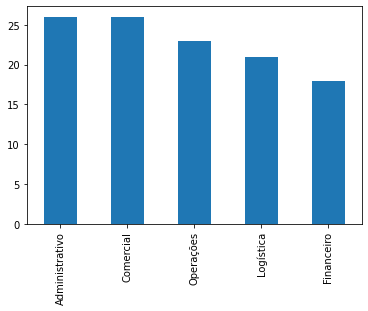

In [9]:
# Obtendo um dicionário com as informações da Área e quantidade de funcionários
funcionarios_area = cadastro_funcionarios_df['Area'].value_counts()

# Printando as quantidades
display(funcionarios_area)

# Plotando um gráfico com as informações
funcionarios_area.plot(kind='bar')

#### 6 - Ticket Médio Mensal 

In [10]:
# Obtendo o faturamento médio mensal de cada contrato
ticket_medio_mensal = cadastro_clientes_df['Valor Contrato Mensal'].mean()

# Formatando o valor para padrão em Reais
ticket_medio_mensal = '{:_.2f}'.format(ticket_medio_mensal).replace('.',',').replace('_','.')

# Printando informação na tela
print('Taxa de ticket médio mensal: R${}'.format(ticket_medio_mensal))

Taxa de ticket médio mensal: R$2.502,56
